In [196]:
import requests
import json
import pandas as pd
import numpy as np
import tb_rest_client.rest_client_ce as tb


# ThingsBoard REST API URL
url = "http://demo.thingsboard.io"

# Default Tenant Administrator credentials
username = "projetogaroaufpa@gmail.com"
password = "projetogaroa123"
deviceID = "91a24bc0-dc36-11ec-8e95-c904ddca5a8a"

In [197]:
cli = tb.RestClientCE(base_url=url)

cli.login(username=username, password=password)

#Mostra atributos de um dispositivo
atributos_lista = cli.get_attributes('DEVICE', deviceID, keys='latitude,longitude,altitude,stationCode')
atributosDF = pd.DataFrame(atributos_lista)
display(atributosDF)

""


In [198]:
url = 'https://apitempo.inmet.gov.br/estacao/2022-06-01/2022-06-09/A201'
resultado = requests.get(url)

In [199]:
#conversão de data para UNIX timestamp
import datetime

def converte(data_string):
  data = datetime.datetime.strptime(data_string, "%d/%m/%Y:%M")
  timestamp = int(datetime.datetime.timestamp(data)*1000)
  return timestamp
 
inicioTempo = converte("31/05/2022:30")
print(inicioTempo)
fimTempo = converte("10/06/2022:30")
print(fimTempo)

1653967800000
1654831800000


In [200]:
dados_inmet_org = resultado.json()
dados_inmet_str = json.dumps(dados_inmet_org)

In [201]:
dados_inmet_tabla = pd.read_json(dados_inmet_str)
dados_inmet_tabla

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1007.7,27.0,-1.411228,1007.7,PA,-0.5,23.3,23.6,-48.439512,...,0.0,23.1,23.8,13.0,1.2,26,23.7,98,A201,0
1,BELÉM,1008.5,27.3,-1.411228,1008.5,PA,-0.7,23.6,23.7,-48.439512,...,0.3,23.3,23.9,13.0,2.2,26,23.9,98,A201,100
2,BELÉM,1008.6,27.4,-1.411228,1008.6,PA,-1.2,23.7,23.8,-48.439512,...,0.3,23.5,24.0,13.0,2.2,25,24.0,98,A201,200
3,BELÉM,1008.4,27.2,-1.411228,1008.8,PA,-0.8,23.4,23.8,-48.439512,...,0.2,23.4,24.0,13.0,3.1,25,23.8,98,A201,300
4,BELÉM,1007.7,27.2,-1.411228,1008.4,PA,-1.3,23.4,23.8,-48.439512,...,0.0,23.4,23.9,13.0,1.9,25,23.8,98,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,BELÉM,1007.0,33.5,-1.411228,1007.1,PA,1748.5,25.5,28.1,-48.439512,...,1.3,24.6,31.0,14.6,4.0,33,30.7,74,A201,1900
212,BELÉM,1008.3,25.5,-1.411228,1008.7,PA,142.9,22.7,23.3,-48.439512,...,1.4,22.6,30.8,13.1,11.3,30,23.3,96,A201,2000
213,BELÉM,1008.6,26.6,-1.411228,1008.6,PA,17.7,22.8,23.3,-48.439512,...,0.1,22.6,23.5,13.1,4.1,27,23.4,97,A201,2100
214,BELÉM,1009.0,26.6,-1.411228,1009.0,PA,1.6,22.9,23.3,-48.439512,...,0.4,22.8,23.4,13.0,1.9,26,23.4,97,A201,2200


In [202]:
dados_inmet = dados_inmet_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS']]

In [203]:
#Mostra séries temporais
series = cli.get_timeseries('DEVICE',deviceID,
                            keys='Umidade,Temperatura',limit=10000,
                            agg="AVG",interval=60*60*1000, #média de hora em hora
                            start_ts=inicioTempo,end_ts=fimTempo)
#print(series)
series_df = pd.DataFrame(series['Temperatura'])
series_df2 = pd.DataFrame(series['Umidade'])
display(series_df)
display(series_df2)

,ts,value
0,1653969600000,27.554545834545454
1,1653973200000,27.10000038
2,1653976800000,27.10000038
3,1653980400000,27.10000038
4,1653984000000,26.750000570000005
...,...,...
234,1654815600000,27.672727583636366
235,1654819200000,27.30000044909091
236,1654822800000,27.033333776666666
237,1654826400000,26.872727825454547


,ts,value
0,1653969600000,88.0
1,1653973200000,88.3
2,1653976800000,89.0
3,1653980400000,89.0
4,1653984000000,89.0
...,...,...
234,1654815600000,75.0
235,1654819200000,76.81818181818181
236,1654822800000,77.25
237,1654826400000,79.0


In [204]:
series_df.columns = ['DT_MEDICAO', 'TEM_INS']
series_df

,DT_MEDICAO,TEM_INS
0,1653969600000,27.554545834545454
1,1653973200000,27.10000038
2,1653976800000,27.10000038
3,1653980400000,27.10000038
4,1653984000000,26.750000570000005
...,...,...
234,1654815600000,27.672727583636366
235,1654819200000,27.30000044909091
236,1654822800000,27.033333776666666
237,1654826400000,26.872727825454547


In [205]:
series_df['UMD_INS'] = series_df2 ['value']
series_df

,DT_MEDICAO,TEM_INS,UMD_INS
0,1653969600000,27.554545834545454,88.0
1,1653973200000,27.10000038,88.3
2,1653976800000,27.10000038,89.0
3,1653980400000,27.10000038,89.0
4,1653984000000,26.750000570000005,89.0
...,...,...,...
234,1654815600000,27.672727583636366,75.0
235,1654819200000,27.30000044909091,76.81818181818181
236,1654822800000,27.033333776666666,77.25
237,1654826400000,26.872727825454547,79.0


In [206]:
data_D = series_df["DT_MEDICAO"].astype('datetime64[ms]')
data_D= pd.DataFrame({"DT_e_HR_MEDICAO":data_D})
data_D

,DT_e_HR_MEDICAO
0,2022-05-31 04:00:00
1,2022-05-31 05:00:00
2,2022-05-31 06:00:00
3,2022-05-31 07:00:00
4,2022-05-31 08:00:00
...,...
234,2022-06-09 23:00:00
235,2022-06-10 00:00:00
236,2022-06-10 01:00:00
237,2022-06-10 02:00:00


In [207]:
dadao_Garoa = data_D
dadao_Garoa[['TEM_INS', 'UMD_INS']] = series_df[['TEM_INS', 'UMD_INS']]

In [208]:
dadao_Garoa

,DT_e_HR_MEDICAO,TEM_INS,UMD_INS
0,2022-05-31 04:00:00,27.554545834545454,88.0
1,2022-05-31 05:00:00,27.10000038,88.3
2,2022-05-31 06:00:00,27.10000038,89.0
3,2022-05-31 07:00:00,27.10000038,89.0
4,2022-05-31 08:00:00,26.750000570000005,89.0
...,...,...,...
234,2022-06-09 23:00:00,27.672727583636366,75.0
235,2022-06-10 00:00:00,27.30000044909091,76.81818181818181
236,2022-06-10 01:00:00,27.033333776666666,77.25
237,2022-06-10 02:00:00,26.872727825454547,79.0


In [209]:
dadao_Garoa.to_csv('data_Garoa.csv', index=False)

In [210]:
dadao_Garoa

,DT_e_HR_MEDICAO,TEM_INS,UMD_INS
0,2022-05-31 04:00:00,27.554545834545454,88.0
1,2022-05-31 05:00:00,27.10000038,88.3
2,2022-05-31 06:00:00,27.10000038,89.0
3,2022-05-31 07:00:00,27.10000038,89.0
4,2022-05-31 08:00:00,26.750000570000005,89.0
...,...,...,...
234,2022-06-09 23:00:00,27.672727583636366,75.0
235,2022-06-10 00:00:00,27.30000044909091,76.81818181818181
236,2022-06-10 01:00:00,27.033333776666666,77.25
237,2022-06-10 02:00:00,26.872727825454547,79.0


In [211]:
dados_inmet

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS
0,2022-06-01,0,23.7,98
1,2022-06-01,100,23.9,98
2,2022-06-01,200,24.0,98
3,2022-06-01,300,23.8,98
4,2022-06-01,400,23.8,98
...,...,...,...,...
211,2022-06-09,1900,30.7,74
212,2022-06-09,2000,23.3,96
213,2022-06-09,2100,23.4,97
214,2022-06-09,2200,23.4,97


<AxesSubplot:>

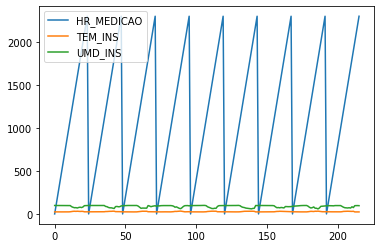

In [212]:
dados_inmet.plot()

In [213]:
dadao_Garoa.head

<bound method NDFrame.head of         DT_e_HR_MEDICAO             TEM_INS            UMD_INS
0   2022-05-31 04:00:00  27.554545834545454               88.0
1   2022-05-31 05:00:00         27.10000038               88.3
2   2022-05-31 06:00:00         27.10000038               89.0
3   2022-05-31 07:00:00         27.10000038               89.0
4   2022-05-31 08:00:00  26.750000570000005               89.0
..                  ...                 ...                ...
234 2022-06-09 23:00:00  27.672727583636366               75.0
235 2022-06-10 00:00:00   27.30000044909091  76.81818181818181
236 2022-06-10 01:00:00  27.033333776666666              77.25
237 2022-06-10 02:00:00  26.872727825454547               79.0
238 2022-06-10 03:00:00  26.700000760000005  80.58333333333333

[239 rows x 3 columns]>

In [214]:
dadao_Garoa = dadao_Garoa.iloc[20:,:].copy()
dadao_Garoa = dadao_Garoa.iloc[:-2,:].copy()

In [215]:
dadao_Garoa = dadao_Garoa.reset_index()

In [216]:
garoa = pd.DataFrame({'HR_MEDICAO':dados_inmet["HR_MEDICAO"]})
garoa['DT_MEDICAO'] = pd.DataFrame({'DT_MEDICAO':dados_inmet["DT_MEDICAO"]})
garoa[['TEM_INS','UMD_INS']] = dadao_Garoa[['TEM_INS','UMD_INS']]
garoa

,HR_MEDICAO,DT_MEDICAO,TEM_INS,UMD_INS
0,0,2022-06-01,27.69090929818182,78.2
1,100,2022-06-01,27.60000038,80.75
2,200,2022-06-01,27.541666983333332,82.33333333333333
3,300,2022-06-01,27.109091323636367,84.45454545454545
4,400,2022-06-01,27.100000379999997,85.2
...,...,...,...,...
211,1900,2022-06-09,30.64545406181818,69.36363636363636
212,2000,2022-06-09,28.933332921666665,70.58333333333333
213,2100,2022-06-09,28.281818216363636,72.27272727272727
214,2200,2022-06-09,27.672727583636366,75.0


In [217]:
dadao_Garoa

,index,DT_e_HR_MEDICAO,TEM_INS,UMD_INS
0,20,2022-06-01 00:00:00,27.69090929818182,78.2
1,21,2022-06-01 01:00:00,27.60000038,80.75
2,22,2022-06-01 02:00:00,27.541666983333332,82.33333333333333
3,23,2022-06-01 03:00:00,27.109091323636367,84.45454545454545
4,24,2022-06-01 04:00:00,27.100000379999997,85.2
...,...,...,...,...
212,232,2022-06-09 21:00:00,28.933332921666665,70.58333333333333
213,233,2022-06-09 22:00:00,28.281818216363636,72.27272727272727
214,234,2022-06-09 23:00:00,27.672727583636366,75.0
215,235,2022-06-10 00:00:00,27.30000044909091,76.81818181818181


In [224]:
garoa.to_csv('data_Garoa.csv', index=False)


<AxesSubplot:>

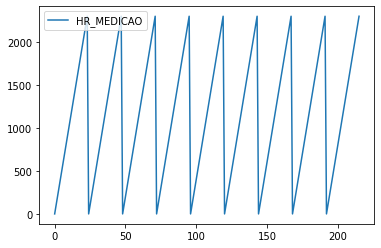

In [223]:
garoa.plot()

<AxesSubplot:>

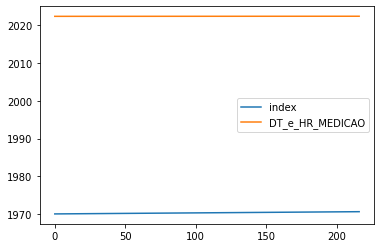

In [220]:
dadao_Garoa.plot()